Part 1: Data Importing, Exploration and Preparation

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Part 1: Data Importing, Exploration, and Preparation

a)

In [2]:
# Load the diabetes dataset from SKLearn Datasets
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print("Shape of the dataset:", df.shape)
print("\nFirst few rows of the DataFrame:")
print(df.head())

Shape of the dataset: (442, 11)

First few rows of the DataFrame:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


b)

In [3]:
# Calculate descriptive statistics
desc_stats = df.describe().T

# Calculate skewness
skewness = df.skew()

# Combine descriptive statistics and skewness
stats_df = pd.concat([desc_stats, skewness], axis=1)
stats_df.columns = ['count', 'mean', 'std',
                    'min', '25%', '50%', '75%', 'max', 'skew']

print(stats_df)

        count          mean        std        min        25%         50%  \
age     442.0 -2.511817e-19   0.047619  -0.107226  -0.037299    0.005383   
sex     442.0  1.230790e-17   0.047619  -0.044642  -0.044642   -0.044642   
bmi     442.0 -2.245564e-16   0.047619  -0.090275  -0.034229   -0.007284   
bp      442.0 -4.797570e-17   0.047619  -0.112399  -0.036656   -0.005670   
s1      442.0 -1.381499e-17   0.047619  -0.126781  -0.034248   -0.004321   
s2      442.0  3.918434e-17   0.047619  -0.115613  -0.030358   -0.003819   
s3      442.0 -5.777179e-18   0.047619  -0.102307  -0.035117   -0.006584   
s4      442.0 -9.042540e-18   0.047619  -0.076395  -0.039493   -0.002592   
s5      442.0  9.293722e-17   0.047619  -0.126097  -0.033246   -0.001947   
s6      442.0  1.130318e-17   0.047619  -0.137767  -0.033179   -0.001078   
target  442.0  1.521335e+02  77.093005  25.000000  87.000000  140.500000   

               75%         max      skew  
age       0.038076    0.110727 -0.231382  
s

c)

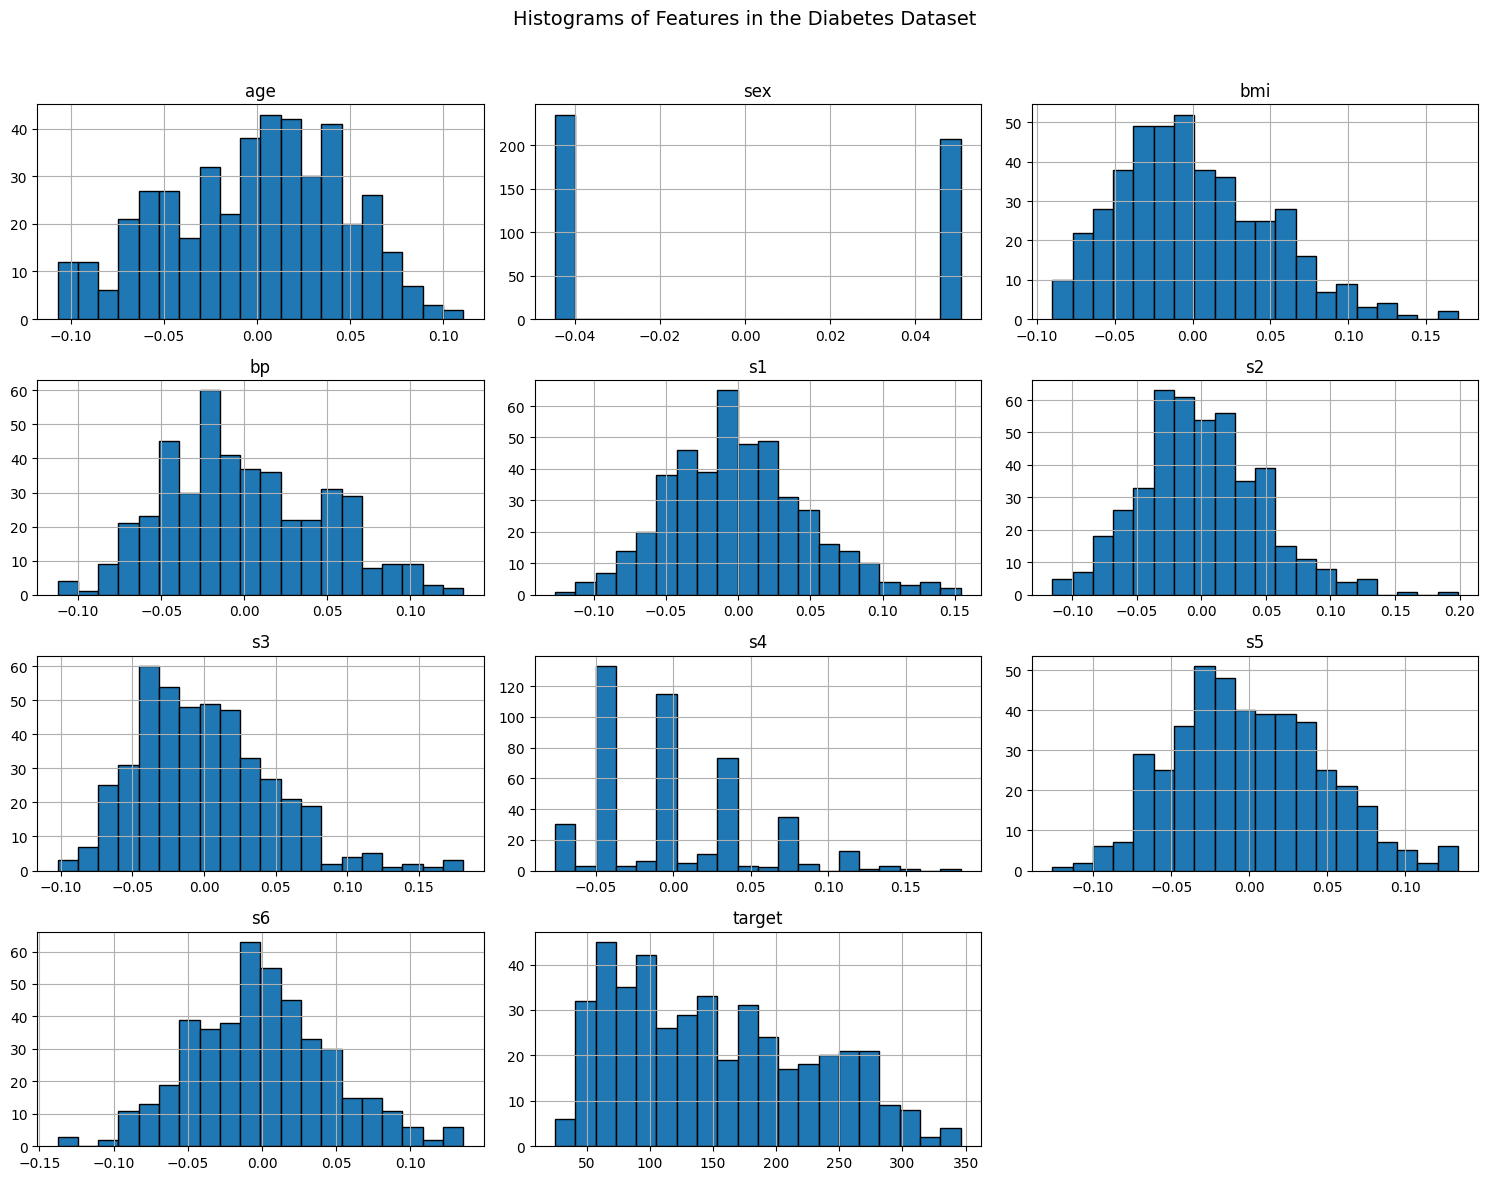

In [18]:
# Plot histograms for each feature in the DataFrame
df.hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Histograms of Features in the Diabetes Dataset', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

d)

In [5]:
# Hint: The DESCR key within the bunch shares details on the data preparation.
print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

##All the data features have been mean centered and scaled by the standard deviation times the square root of 'n_samples'. Despite standardization, we observe some skewness in features therefore additional transformations could be applied to reduce skewness and make the distributions closer to normal.

e)

In [6]:
# Calculate correlations with target and sort by absolute value
abs_correlations = df.corr()['target'].abs().sort_values(ascending=False)
print(abs_correlations)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s3        0.394789
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
Name: target, dtype: float64


The feature bmi has the highest correlation with the target variable.

f)

In [7]:
# partition the data into training and testing data sets.
X = df['bmi']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=204)

# Convert X_train and X_test to a NumPy array to ensure it's 2D
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

# Ensure y_train is a 1D NumPy array
y_train = y_train.to_numpy()

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((353, 1), (89, 1), (353,), (89,))

Part 2: Model Training

a)

In [8]:

# Instantiate the linear regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)

print('Model trained successfully')

Model trained successfully


Part 3: Prediction and Evaluation

a)

In [9]:
# Print the slope and intercept
print(f'slope (coefficient): {lr_model.coef_[0]:.4f}')
print(f'Intercept: {lr_model.intercept_:.4f}')

slope (coefficient): 951.9511
Intercept: 151.9939


b)

In [10]:
# Make predictions on training data
y_train_prediction = lr_model.predict(X_train)

#Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_prediction))

print(f'Training RMSE:{rmse_train:.5f}')

Training RMSE:62.53253


c)

In [11]:
# Calculate the standard deviation of the training data target values
print(f'Standard deviation of training target values: {np.std(y_train):.3f}')

Standard deviation of training target values: 77.290


d)

##The RMSE(62.5325) and is smaller than the standard deviation (77.299) meaning the model's prediction is making better predictions than just predicting the mean. However, the difference between the two values is not extremely large which is an indication that there is still room for improvement in the model's performance like including additional features in combination with BMI.

e)

In [12]:
# Make predictions on training data
y_test_prediction = lr_model.predict(X_test)

# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_prediction))

print(f'Testing RMSE:{rmse_train:.3f}')

Testing RMSE:62.533


Part 4: Visualization

a)

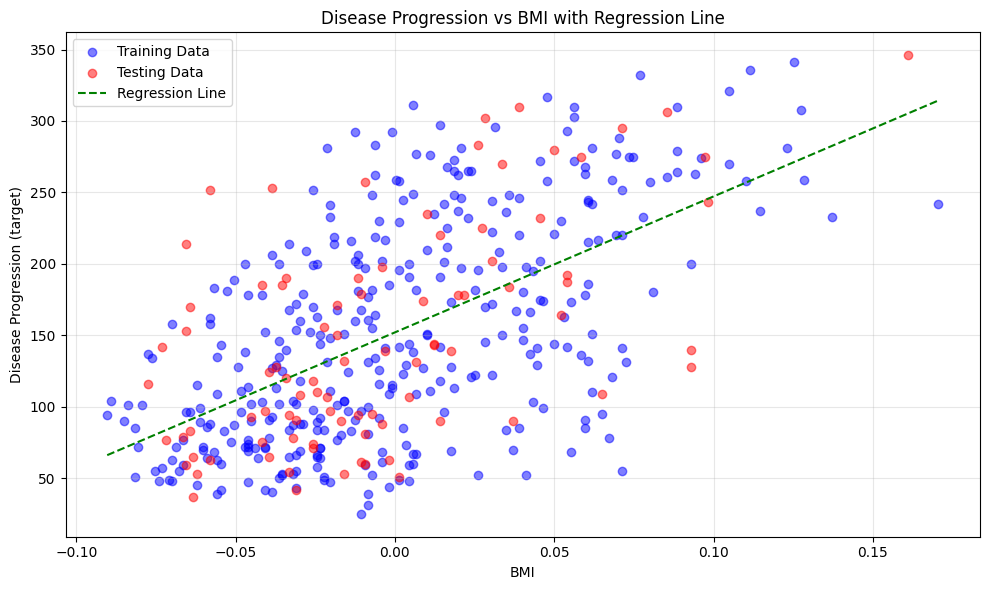

In [13]:

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot training data points
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')

# Plot testing data points
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Testing Data')

# Create regression line
# Generate points for the regression line
X_line = np.linspace(df['bmi'].min(), df['bmi'].max(), 100).reshape(-1, 1)
y_line = lr_model.predict(X_line)

# Plot regression line
plt.plot(X_line, y_line, color='green',
         linestyle='--', label='Regression Line')

# The plot
plt.xlabel('BMI')
plt.ylabel('Disease Progression (target)')
plt.title('Disease Progression vs BMI with Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)

# layout and display
plt.tight_layout()
plt.show()